In [1]:
# won't use all
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.optimize import minimize
import cvxpy as cp
import pytz
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.tsa.api as smt
from copy import deepcopy
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
import warnings
warnings.filterwarnings("ignore")
import statsmodels.tools.eval_measures
import scipy 
from scipy import stats

In [32]:
data = pd.read_excel('w2t2_data.xlsx', sheet_name='Sheet1', header=0)
data.columns = ["demand", "tue", "pur", "dow"]
data["apur"] = data["pur"]/data["dow"]
data = data.head(87)
data

,demand,tue,pur,dow,apur
0,1470.0,1512,0.972222,0.864773,1.124252
1,870.0,864,1.006944,0.910585,1.105821
2,986.0,827,1.192261,0.972883,1.225493
3,1247.0,952,1.309874,1.012525,1.293671
4,1109.0,740,1.498649,1.067881,1.403385
...,...,...,...,...,...
82,1093.0,932,1.172747,1.122727,1.044552
83,1217.0,969,1.255934,1.048626,1.197695
84,1542.0,1562,0.987196,0.864773,1.141567
85,988.0,1004,0.984064,0.910585,1.080694


In [21]:
def test_stationarity(data):
    rolling_mean = data.rolling(window=7).mean()
    rolling_std = data.rolling(window=7).std()
    
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(data, label='Original')
    ax.plot(rolling_mean, label='Rolling Mean')
    ax.plot(rolling_std, label='Rolling Std')
    
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    plt.title('Rolling Mean and Standard Deviation - {}'.format(data.name))
    plt.tight_layout()
    plt.show()
    
    result = adfuller(data)
    print('Augumented Dickey-Fuller Test')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
def acf_analysis(data):
    auto = sm.tsa.stattools.acf(data, nlags=len(data))

    fig, ax = plt.subplots(figsize=(20, 4))
    plot_acf(data, ax=ax, lags=len(data)-1)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation')
    plt.tight_layout()
    plt.show()
    
def pacf_analysis(data):
    partial_auto = sm.tsa.stattools.pacf(data, method='ywm')

    fig, ax = plt.subplots(figsize=(20, 4))
    plot_pacf(data, ax=ax, method='ywm')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation')
    plt.tight_layout()
    plt.show()
    
def stl_analysis(data):
    stl = STL(data, period = 12).fit()

    plt.suptitle('Seasonal Trend Decomposition using LOESS')

    plt.subplot(411)
    plt.plot(stl.observed)
    plt.xticks([])
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(stl.trend)
    plt.xticks([])
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(stl.seasonal)
    plt.xticks([])
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(stl.resid)
    plt.xticks(rotation=45) 
    plt.title('Residual')

    plt.tight_layout()
    plt.show()

pickup ratio acf


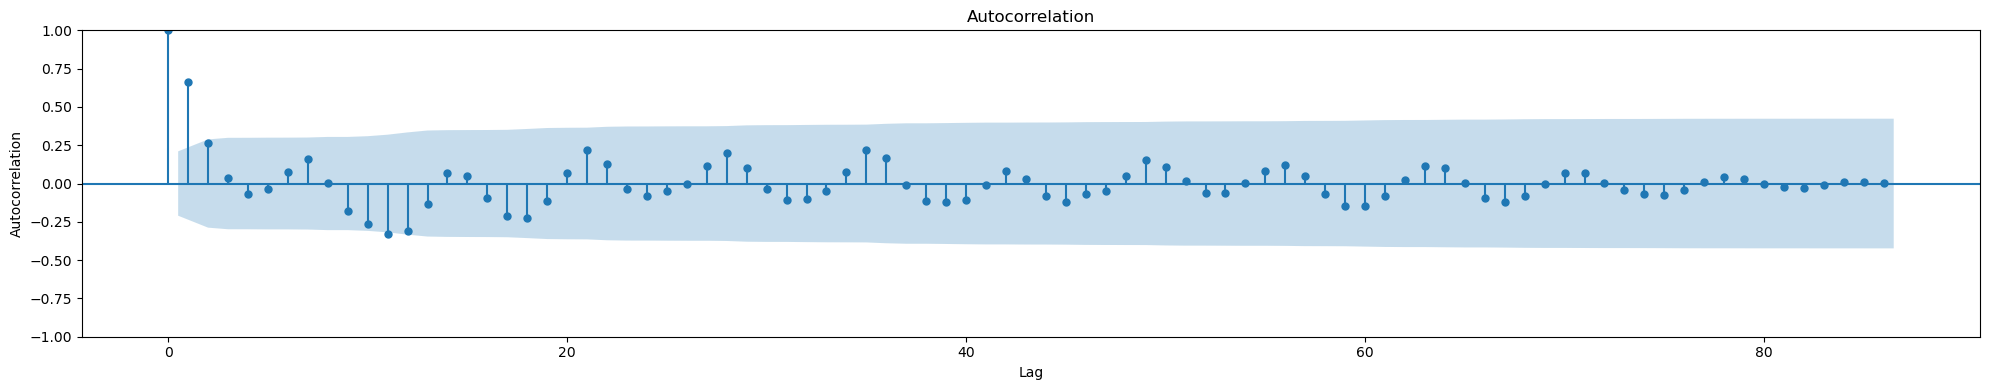



demand acf


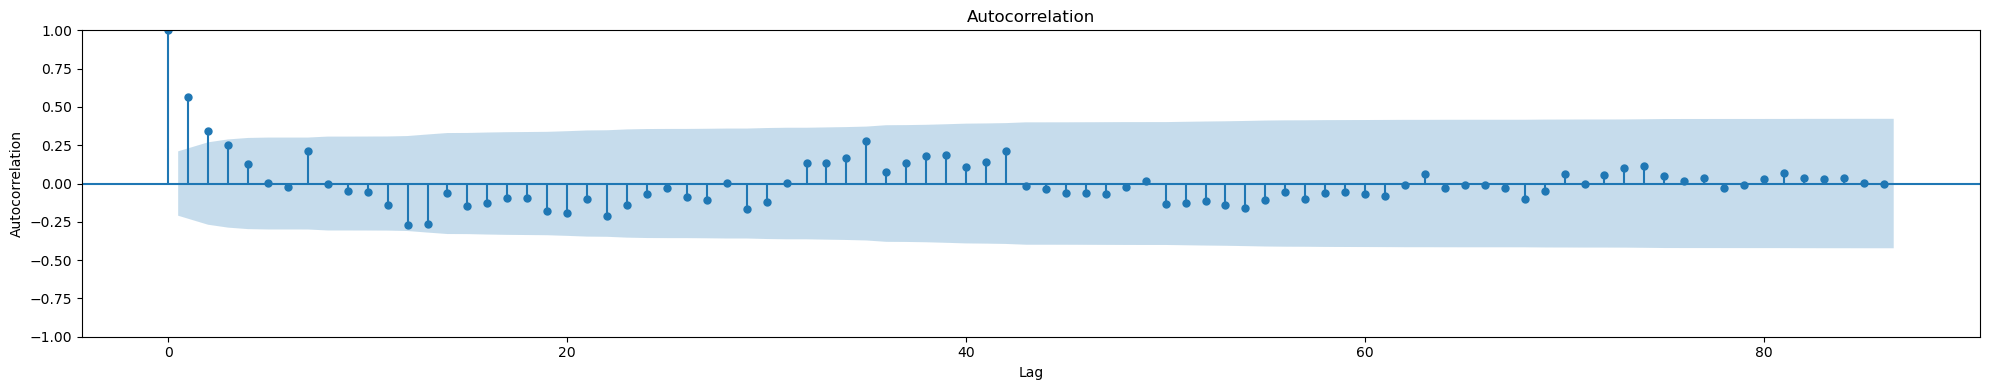



adjusted pickup ratio acf


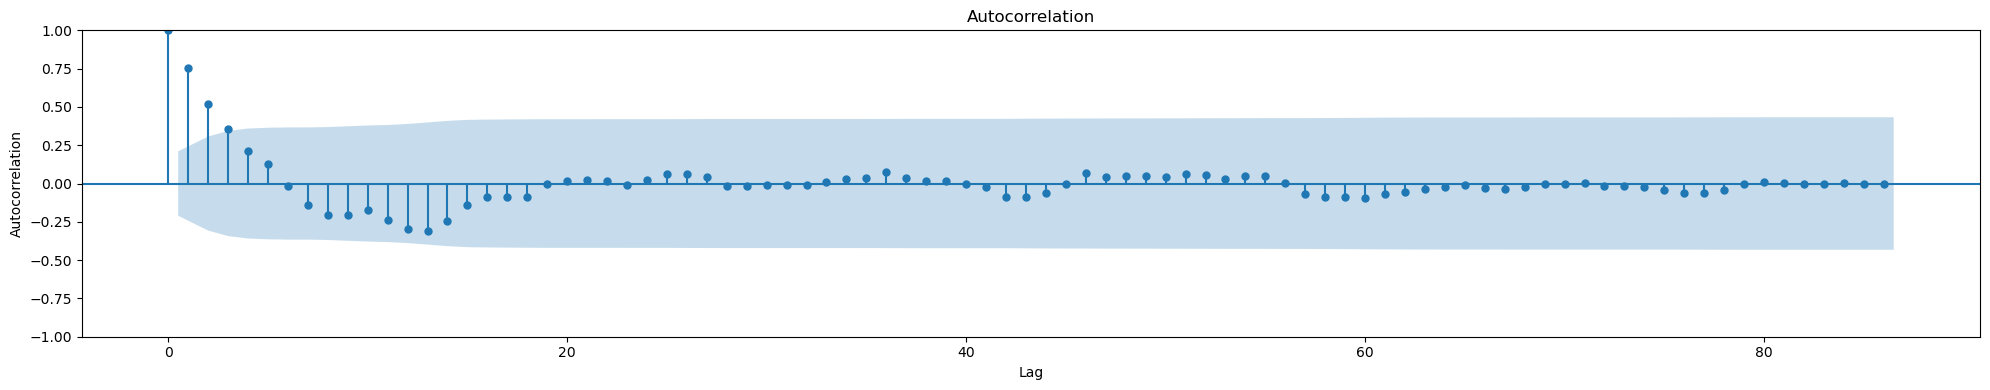

In [22]:
print("pickup ratio acf")
acf_analysis(data.head(87)["pur"])
print("\n")
print("demand acf")
acf_analysis(data.head(87)["demand"])
print("\n")
print("adjusted pickup ratio acf")
acf_analysis(data.head(87)["apur"])

pickup ratio pacf


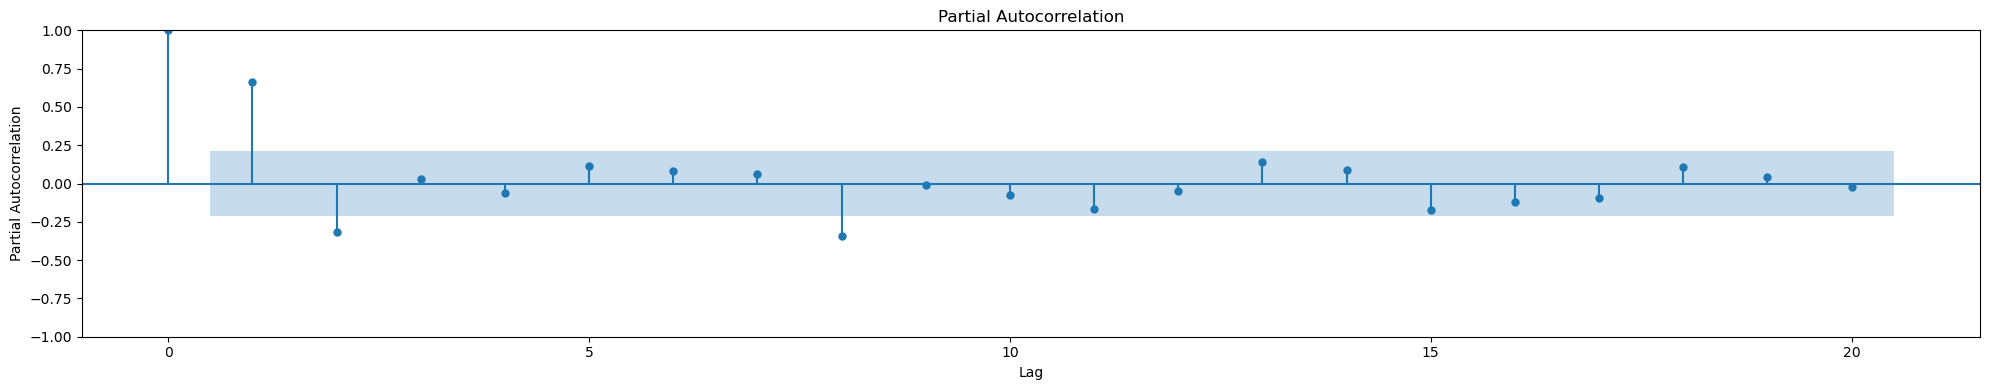



demand pacf


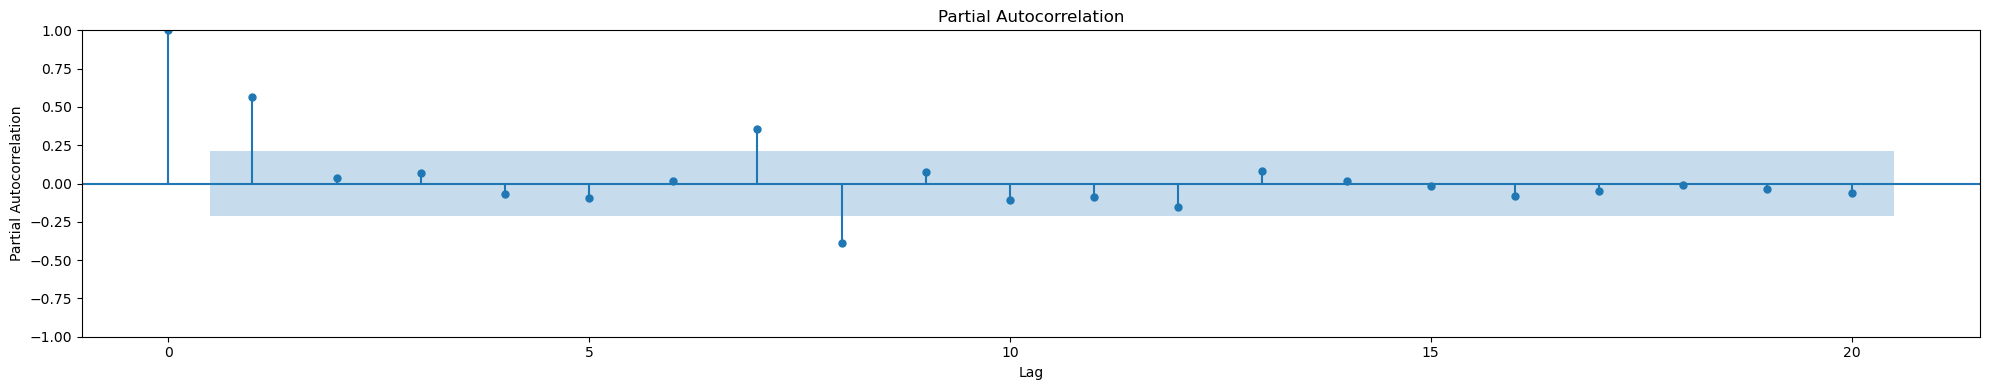



adjusted pickup ratio pacf


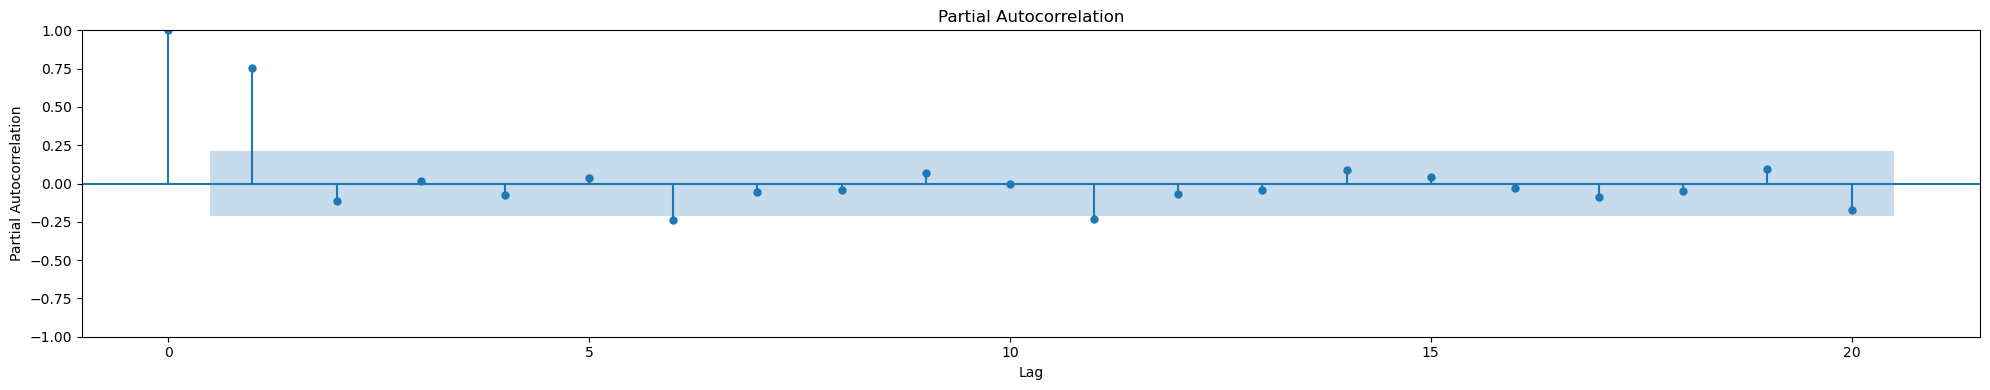

In [23]:
print("pickup ratio pacf")
pacf_analysis(data.head(87)["pur"])
print("\n")
print("demand pacf")
pacf_analysis(data.head(87)["demand"])
print("\n")
print("adjusted pickup ratio pacf")
pacf_analysis(data.head(87)["apur"])

pickup ratio decomposition


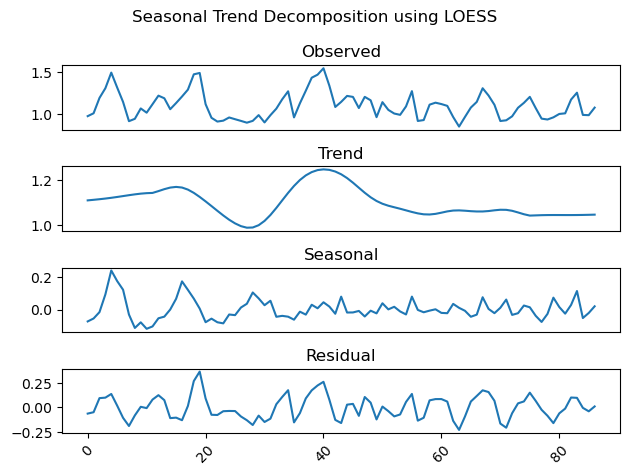



demand decomposition


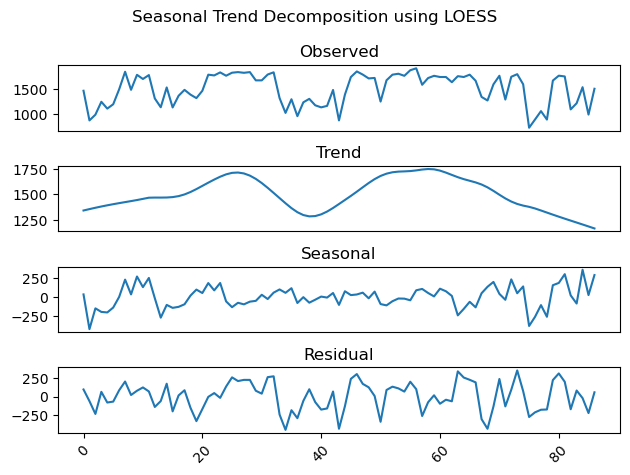



adjusted pickup ratio decomposition


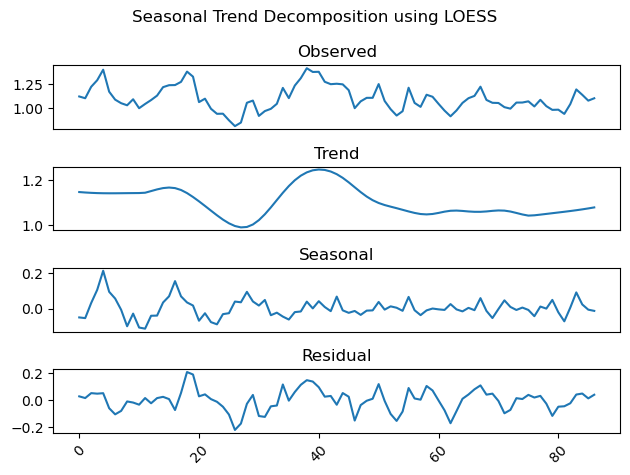

In [24]:
print("pickup ratio decomposition")
stl_analysis(data.head(87)["pur"])
print("\n")
print("demand decomposition")
stl_analysis(data.head(87)["demand"])
print("\n")
print("adjusted pickup ratio decomposition")
stl_analysis(data.head(87)["apur"])

In [26]:
for i in range(len(["demand", "tue", "pur", "dow", "apur"])):
    print(data.columns[i])
    ic = arma_order_select_ic(data[data.columns[i]], max_ar = 10, max_ma = 10, ic =["aic", "bic", "hqic"])
    print("aic:")
    print(ic.aic_min_order)
    print("hqic:")
    print(ic.hqic_min_order)
    print("bic:")
    print(ic.bic_min_order)
    print("\n")

demand
aic:
(8, 7)
hqic:
(8, 0)
bic:
(8, 0)


tue
aic:
(8, 7)
hqic:
(10, 2)
bic:
(8, 0)


pur
aic:
(6, 5)
hqic:
(2, 4)
bic:
(2, 0)


dow
aic:
(10, 5)
hqic:
(10, 5)
bic:
(10, 5)


apur
aic:
(1, 0)
hqic:
(1, 0)
bic:
(1, 0)




demand


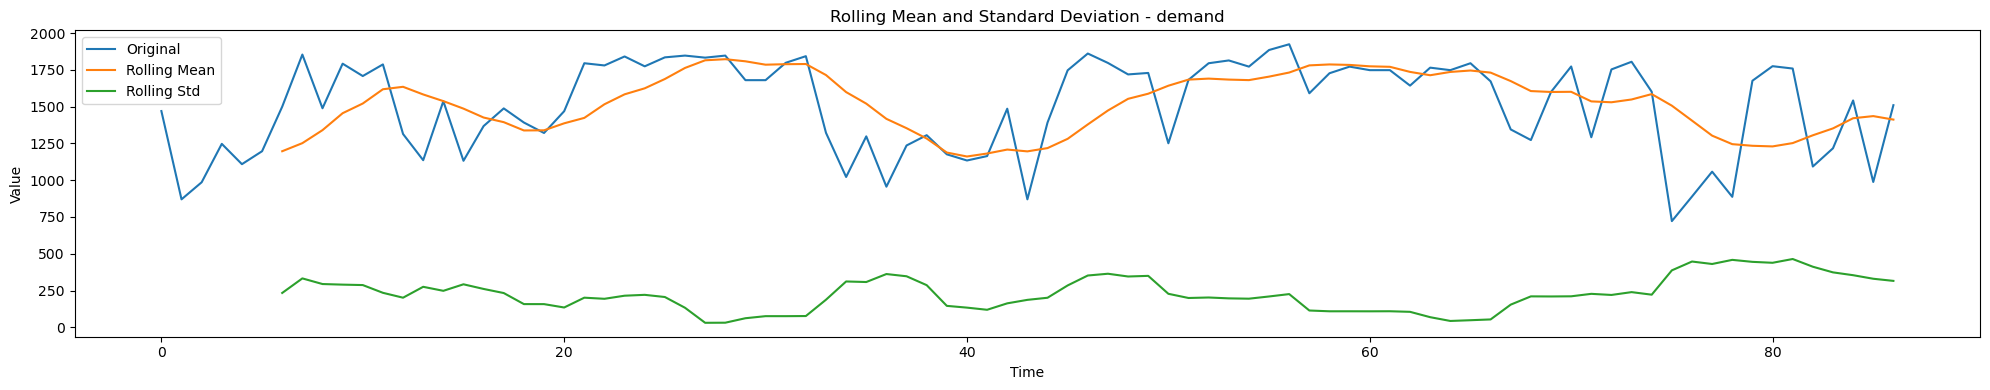

Augumented Dickey-Fuller Test
ADF Statistic: -2.8736921680972873
p-value: 0.04849388415857988
Critical Values: {'1%': -3.5194805351545413, '5%': -2.9003945086747343, '10%': -2.5874984279778395}


tue


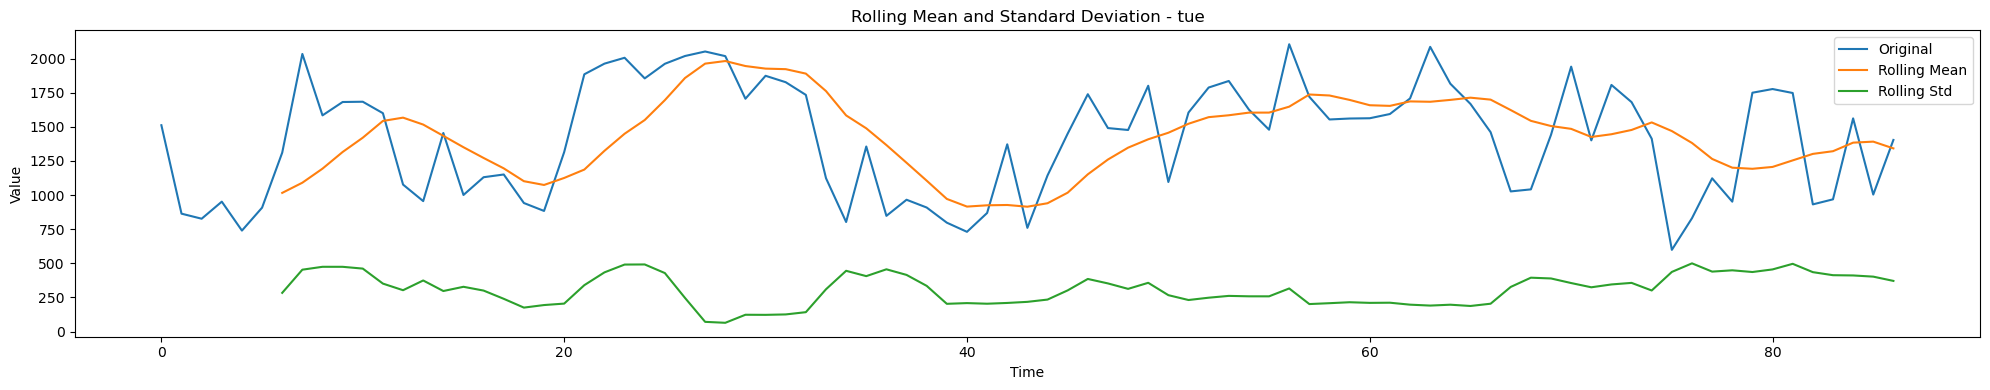

Augumented Dickey-Fuller Test
ADF Statistic: -2.8123512964565123
p-value: 0.056531017817185114
Critical Values: {'1%': -3.5219803175527606, '5%': -2.9014701097664504, '10%': -2.58807215485756}


pur


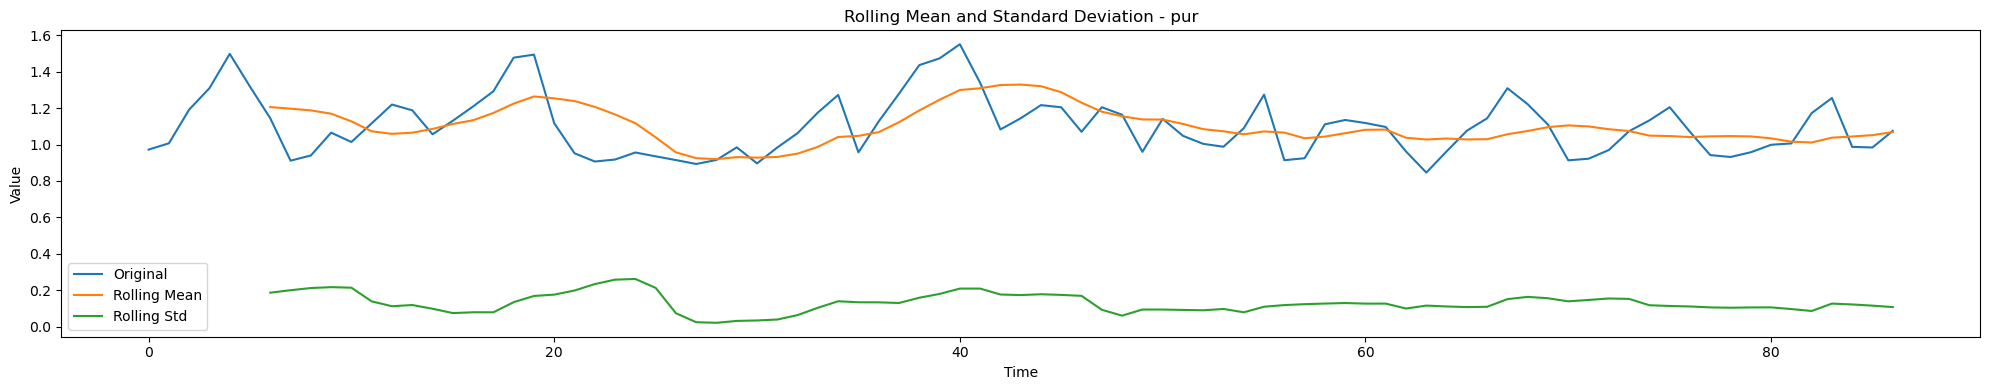

Augumented Dickey-Fuller Test
ADF Statistic: -3.295667135368634
p-value: 0.015073268089713012
Critical Values: {'1%': -3.5159766913976376, '5%': -2.898885703483903, '10%': -2.5866935058484217}


dow


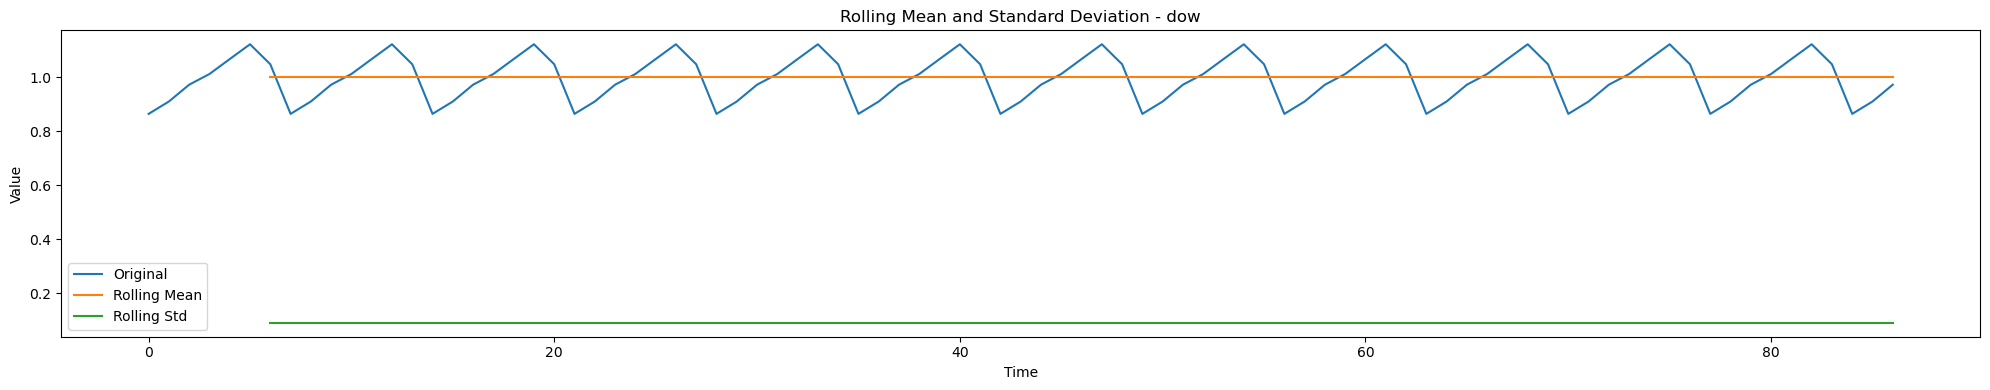

Augumented Dickey-Fuller Test
ADF Statistic: -4879503417641953.0
p-value: 0.0
Critical Values: {'1%': -3.520713130074074, '5%': -2.9009249540740742, '10%': -2.5877813777777776}


apur


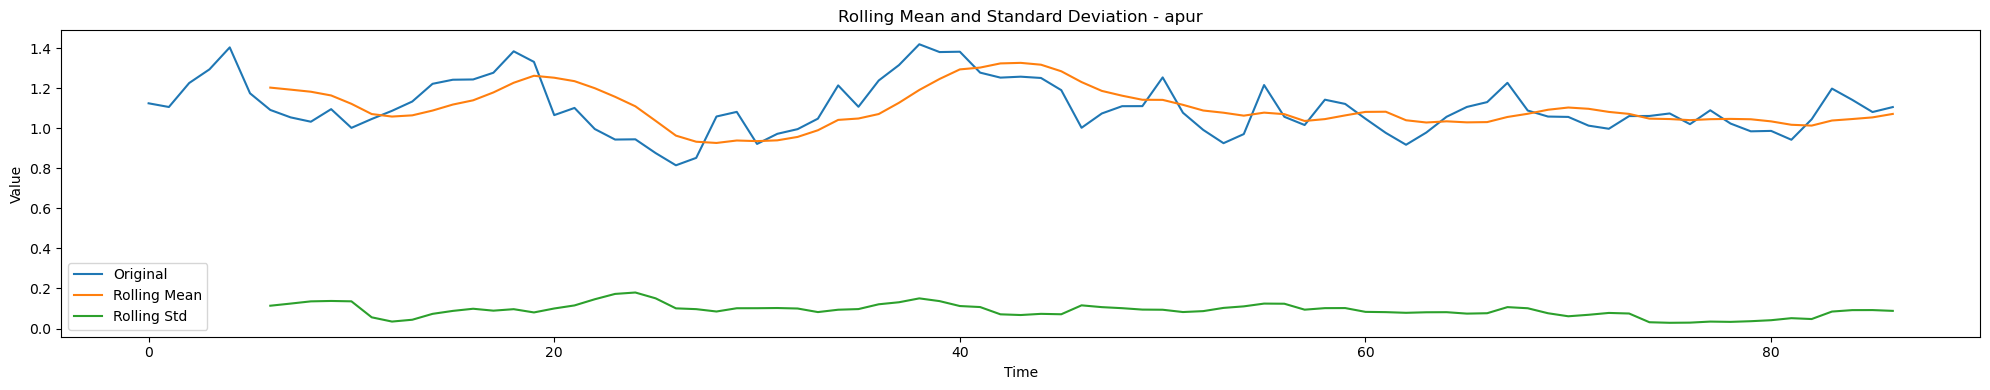

Augumented Dickey-Fuller Test
ADF Statistic: -3.444425369442227
p-value: 0.009534485677945442
Critical Values: {'1%': -3.5087828609430614, '5%': -2.895783561573195, '10%': -2.5850381719848565}




In [27]:
for i in range(len(["demand", "tue", "pur", "dow", "apur"])):
    print(data.columns[i])
    test_stationarity(data[data.columns[i]])
    print("\n")

In [152]:
snow = ARIMA(data["apur"].head(57), order=(1, 0, 0)).fit()
snow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   apur   No. Observations:                   57
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  52.720
Date:                Wed, 18 Oct 2023   AIC                            -99.440
Time:                        21:24:55   BIC                            -93.310
Sample:                             0   HQIC                           -97.058
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1246      0.051     22.069      0.000       1.025       1.224
ar.L1          0.7485      0.088      8.469      0.000       0.575       0.922
sigma2         0.0091      0.002      4.251      0.000       0.005       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.54   Prob(JB):                         0.67
Heteroskedasticity (H):               1.43   Skew:                            -0.09
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
snow_fc = snow.forecast(30)*data["dow"].tail(30)

In [149]:
snow_mse = statsmodels.tools.eval_measures.mse(snow_fc, data["pur"].tail(30), axis=0)
snow_mse


0.008797726397010135

(-2.0, 2.0)

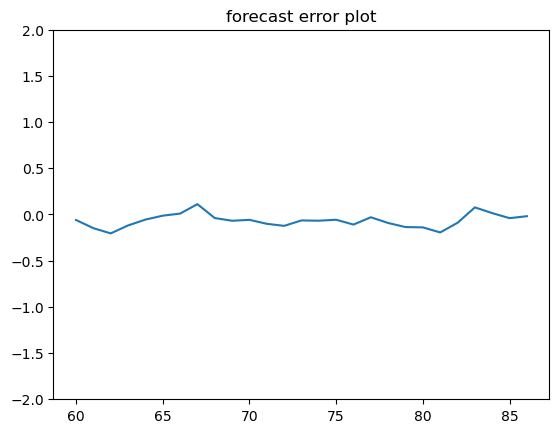

In [150]:
plt.plot(data["pur"].tail(27)-snow_fc, label = "snow approach error")
plt.title("forecast error plot")
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim([-2, 2])

In [143]:
nosnow_aic = ARIMA(data["pur"].head(57), order=(2, 0, 0)).fit()
nosnow_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    pur   No. Observations:                   57
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  36.822
Date:                Wed, 18 Oct 2023   AIC                            -65.643
Time:                        21:07:26   BIC                            -57.471
Sample:                             0   HQIC                           -62.467
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1154      0.048     23.407      0.000       1.022       1.209
ar.L1          0.8621      0.136      6.319      0.000       0.595       1.129
ar.L2         -0.2663      0.143     -1.861      0.063      -0.547       0.014
sigma2         0.0159      0.003      4.754      0.000       0.009       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.95   Prob(JB):                         0.70
Heteroskedasticity (H):               1.60   Skew:                            -0.26
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
nosnow_aic_mse = statsmodels.tools.eval_measures.mse(nosnow_aic.forecast(30), data["pur"].tail(30), axis=0)
nosnow_aic_mse

0.01613444066768469

(-2.0, 2.0)

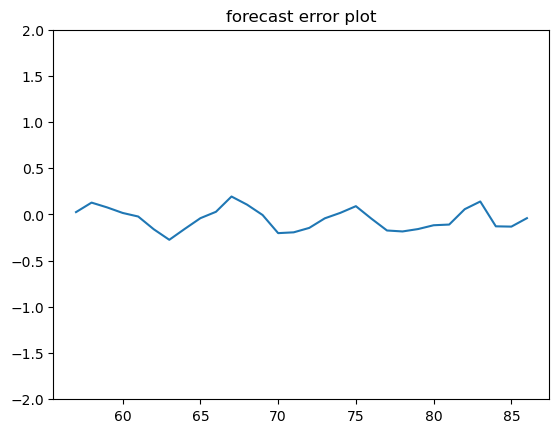

In [145]:
plt.plot(data["pur"].tail(30)-nosnow_aic.forecast(30), label = "non-snow approach error")
plt.title("forecast error plot")
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim([-2, 2])

In [154]:
snow_re = ARIMA(data["apur"], order=(1, 0, 0)).fit()
snow_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   apur   No. Observations:                   87
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  90.187
Date:                Wed, 18 Oct 2023   AIC                           -174.374
Time:                        21:30:21   BIC                           -166.977
Sample:                             0   HQIC                          -171.396
                                 - 87                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1046      0.037     29.923      0.000       1.032       1.177
ar.L1          0.7445      0.067     11.153      0.000       0.614       0.875
sigma2         0.0073      0.001      5.748      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.37   Prob(JB):                         0.79
Heteroskedasticity (H):               0.46   Skew:                             0.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
DOW = np.array([1.013, 1.068, 1.123, 1.049, 0.865, 0.911, 0.973, 1.013, 1.068, 1.123, 1.049])
TUE = np.array([1657, 1643, 1124, 1074, 1839, 1862, 1886, 1696, 1002, 794, 1106])
APUR = snow_re.forecast(len(DOW))
demand = DOW * TUE * APUR
week = ["TUE", "WED", "THU", "FRI", "SAT", "SUN", "MON", "TUE", "WED", "THU", "FRI"]
demand.index = week

In [173]:
demand.round()

TUE    1855.0
WED    1939.0
THU    1395.0
FRI    1245.0
SAT    1757.0
SUN    1874.0
MON    2027.0
TUE    1898.0
WED    1182.0
THU     985.0
FRI    1282.0
Name: predicted_mean, dtype: float64

In [174]:
APUR*DOW

87    1.119631
88    1.180251
89    1.240899
90    1.159037
91    0.955680
92    1.006457
93    1.074919
94    1.119081
95    1.179819
96    1.240561
97    1.158802
Name: predicted_mean, dtype: float64

In [187]:
pred = snow_re.predict()*data["dow"]
n = 1
error = []
for i in range(13):
    error.append(pred[n]-data["pur"][n])
    n += 7

error

[0.012220395303539355,
 0.03153967804123137,
 -0.04574626178435093,
 0.09673584820062864,
 -0.01024847940255158,
 -0.11994909397623799,
 -0.03865656048748889,
 -0.13182275614280847,
 0.048532517376621453,
 -0.04225083710103683,
 0.050889135616981496,
 0.06384288788741499,
 0.04683975884855429]

(array([2., 0., 0., 2., 1., 1., 1., 4., 1., 1.]),
 array([-0.13182276, -0.1089669 , -0.08611104, -0.06325517, -0.04039931,
        -0.01754345,  0.00531241,  0.02816827,  0.05102413,  0.07387999,
         0.09673585]),
 <BarContainer object of 10 artists>)

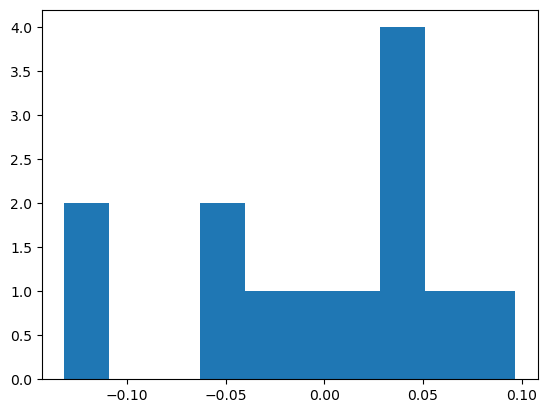

In [188]:
plt.hist(error)

In [190]:
(1/13)*(1839*(0.955680 + 0.04683975884855429)-1877)

-2.5666279598083817

In [193]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,15045.813905,-253.692971,-251.998123,inf,0.141533,0.924554
uniform,15076.349614,-291.192525,-290.062627,inf,0.222760,0.472273
norm,15210.467448,-251.111332,-249.981434,inf,0.157320,0.856247
lognorm,15215.240865,-249.202633,-247.507785,inf,0.158812,0.848839
gamma,15243.748935,-249.764169,-248.069321,inf,0.164299,0.820315


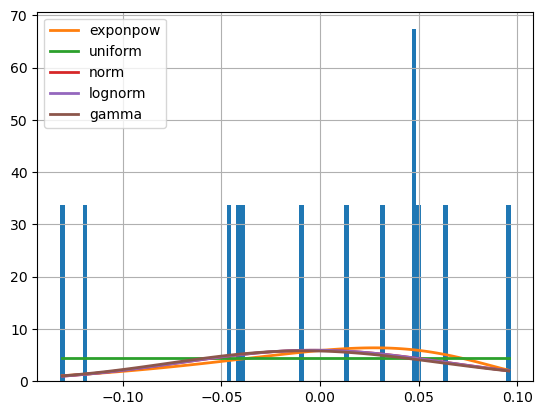

In [194]:
f = Fitter(error, distributions= get_common_distributions())
f.fit()
f.summary()